In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
import pprint
import spectral
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
img = spectral.open_image('/pio/scratch/2/ED2015/APEX/APEX_OSD_Package_1.0/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube.hdr')
data = img.load()

/pio/os/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  # This is added back by InteractiveShellApp.init_path()


In [2]:
X = data.reshape(-1, data.shape[-1])
X_std = (X - X.mean(0)) / X.std(0)

In [3]:

import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
from scipy import signal

# A hepler function for displaying images within the notebook.
# It displays an image, optionally applies zoom the image.
def show_image(img, zoom=1.5):
    dpi = 77
    plt.figure(figsize=(img.shape[0]*zoom/dpi,img.shape[0]*zoom/dpi))
    if len(img.shape) == 2:
        img = np.repeat(img[:,:,np.newaxis],3,2)        
    plt.imshow(img, interpolation='nearest')
    

# A hepler function for displaying images within the notebook.
# It may display multiple images side by side, optionally apply gamma transform, and zoom the image.
def show_images(imglist, zoom=1, needs_encoding=False):
    if type(imglist) is not list:
       imglist = [imglist]
    n = len(imglist)
    first_img = imglist[0]
    dpi = 77 # pyplot default?
    plt.figure(figsize=(first_img.shape[0]*zoom*n/dpi,first_img.shape[0]*zoom*n/dpi))
    for i in range(0,n):
        img = imglist[i]
        plt.subplot(1,n,i + 1)
        plt.tight_layout()    
        plt.axis('off')
        if len(img.shape) == 2:
           img = np.repeat(img[:,:,np.newaxis],3,2)
        plt.imshow(img, interpolation='nearest')    

In [6]:
def show_image(model, name = '', only_one = True):
    img = model.labels_.reshape(data.shape[0], data.shape[1])
    if not only_one:
        n = np.max(img)
        print(n)
        fig, axes = plt.subplots(n+1)
        fig.set_size_inches(15,15*n)
        for i in range(n):
            axes[i].imshow((img + 1) * (img==i))
        axes[n].imshow(img)
    else:
        fig, axes = plt.subplots(1)
        fig.set_size_inches(15,15)
        plt.imshow(img)
    fig.suptitle(name)

3
Finished
4
Finished
5
Finished
6
Finished
7
Finished


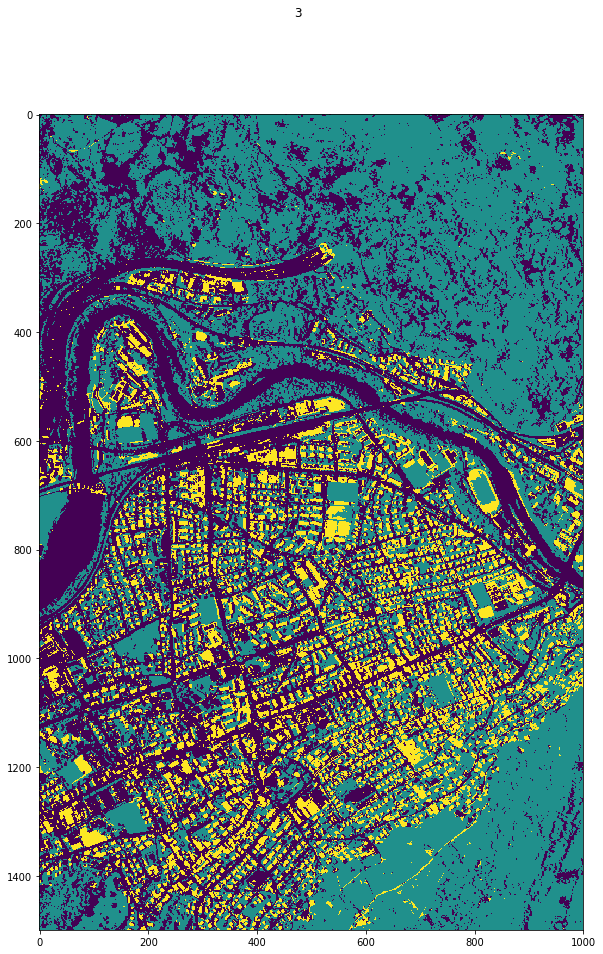

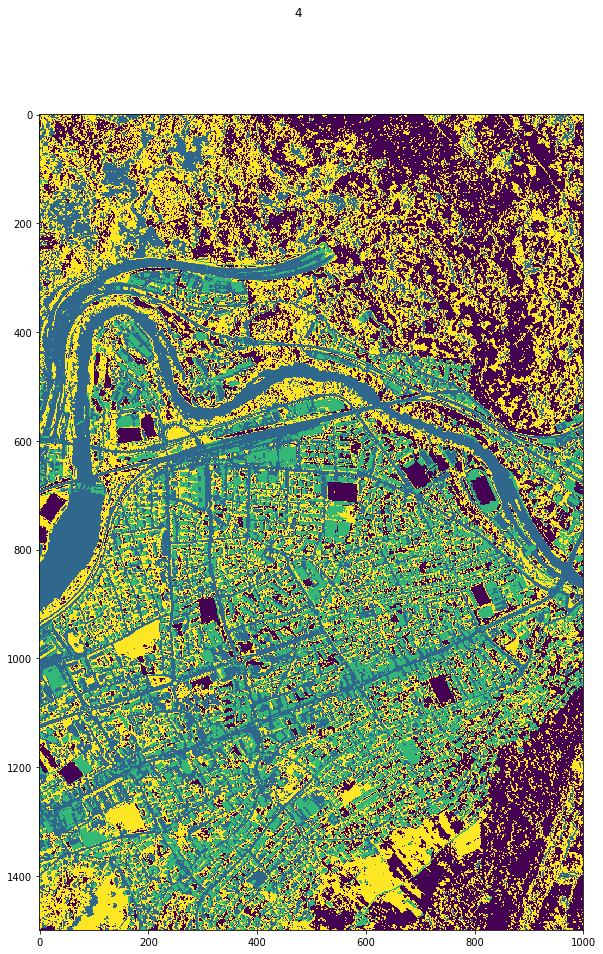

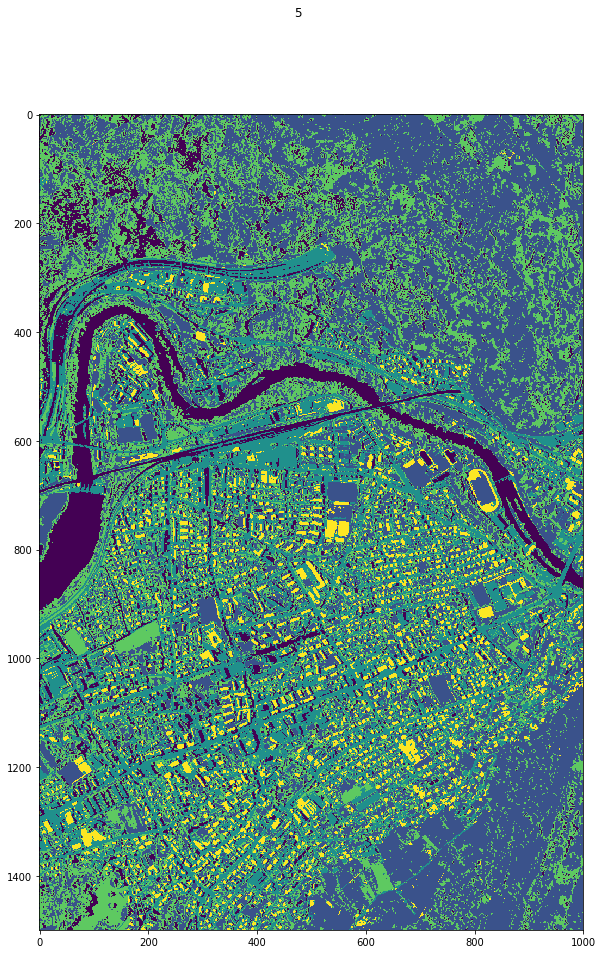

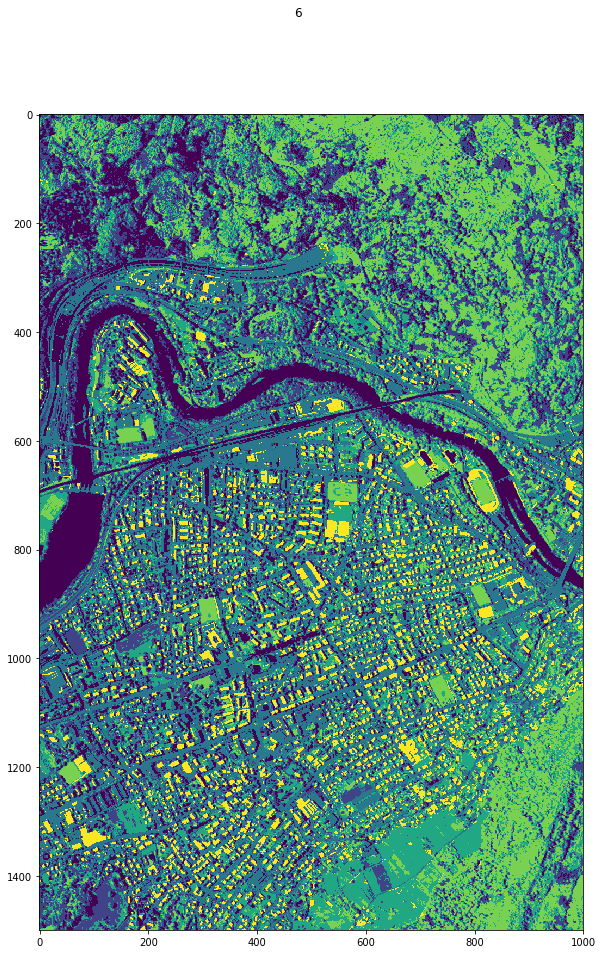

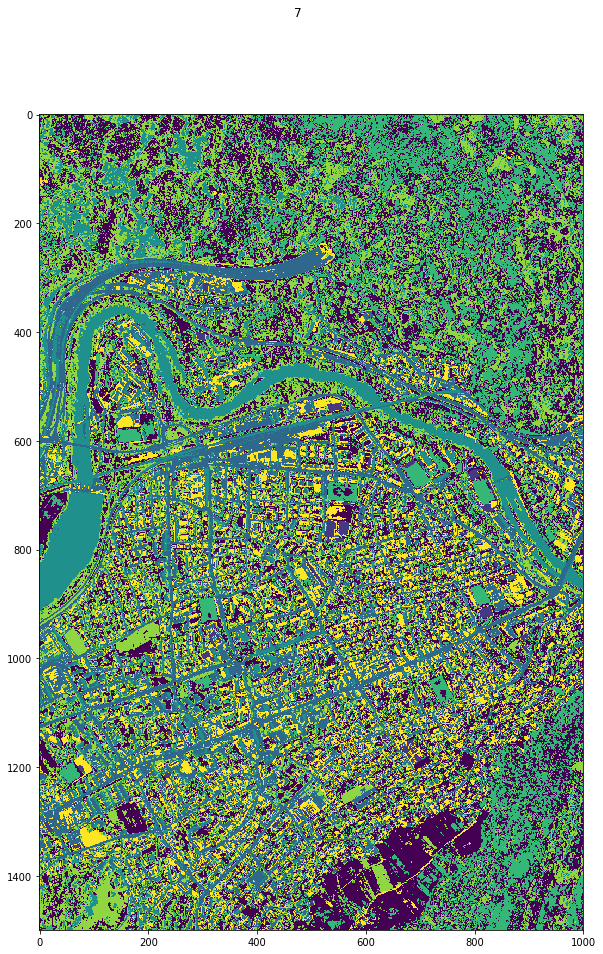

In [10]:
n = 5
# # params = dict(n_clusters=n, n_init=15)
# model = MiniBatchKMeans(n_clusters=n, n_init=15)
# model.fit(X)
functions = [
    ('MiniBatchKMeans', MiniBatchKMeans(n_clusters=n, n_init=15)),
#     ('Bearch', Birch(threshold=0.75, n_clusters=5)),
#     ('DBScan',DBSCAN(eps=0.5, min_samples=5))
]
for i in range(3, 8):
    print(i)
    model = MiniBatchKMeans(n_clusters=i, n_init=15)
    model.fit(X)
    print("Finished")
    show_image(model, name=str(i))


In [8]:
model.labels_

array([-1, -1, -1, ..., -1, -1, -1])